In [1]:
# imports to write dynamic markdown contents
import os
from IPython.display import display, Markdown, Latex
from IPython.display import HTML

In [2]:
# turn off/on code for the result HTML page

display(Markdown('*For the result HTML page:* '))
    
HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

*For the result HTML page:* 

In [3]:
import uproot

import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors
import numpy as np
import glob
mpl.style.use('seaborn-talk')

# Open an example file

In [4]:
file = uproot.open("/sphenix/user/trinn/forcsi/testtrainingfile.root")

n_channel_per_event = 64

The file contains only one object (`trainingtree` of class `TTree`)

In [5]:
file.keys()

['trainingtree;1']

Each row in `trainingtree` is one event containing 64 channels [0...63]. Each channel has a waveform of 32 ADC samples `int32`[0...31], its best amplitude, time and pedestal based on traditional functional form analysis by Tim. Note the last ADC number [31] is always zero. Let's ignore it. 

In [6]:
trainingtree = file["trainingtree"]
trainingtree.keys()

['eventnumber', 'train_amplitude', 'train_time', 'train_pedestal', 'waveform']

In [7]:
trainingtree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
eventnumber          | int32_t                  | AsDtype('>i4')
train_amplitude      | float[64]                | AsDtype("('>f4', (64,))")
train_time           | float[64]                | AsDtype("('>f4', (64,))")
train_pedestal       | float[64]                | AsDtype("('>f4', (64,))")
waveform             | int32_t[64][32]          | AsDtype("('>i4', (64, 32))")


# Sample ADC content

We can dump the TTree content into a `np.array` or dataframe in various ways using [`uproot`](https://uproot.readthedocs.io/en/latest/basic.html): 

In [8]:
df_waveform = trainingtree["waveform"].array(library="pd")
df_waveform

,[0][0],[0][1],[0][2],[0][3],[0][4],[0][5],[0][6],[0][7],[0][8],[0][9],...,[63][22],[63][23],[63][24],[63][25],[63][26],[63][27],[63][28],[63][29],[63][30],[63][31]
0,1646,1642,1641,1645,1647,1645,1645,1643,1646,1646,...,1532,1531,1534,1535,1535,1533,1532,1534,1526,0
1,1647,1647,1647,1645,1647,1642,1648,1645,1647,1644,...,1537,1536,1531,1538,1537,1537,1535,1534,1534,0


In [9]:
array_train_amplitude = trainingtree["train_amplitude"].array(library="np")
array_train_amplitude

array([[ 5.25148344e+00,  6.59244967e+00,  3.34370255e+00,
        -1.50078738e+00,  1.34611130e+00,  3.84263253e+00,
         3.60258961e+00,  6.33303118e+00,  2.13221335e+00,
         4.95701742e+00,  9.36920452e+00,  4.24166632e+00,
         5.94443703e+00,  2.57152915e+00,  2.11203194e+00,
         2.11096215e+00,  5.90936136e+00,  1.56662405e+00,
         9.51362705e+00,  1.09906883e+01,  9.70515537e+00,
         3.16336250e+00,  6.05885172e+00,  5.60935640e+00,
         1.00729716e+00,  2.60155463e+00,  5.47631598e+00,
         2.22471046e+01,  3.48244705e+01,  1.08486261e+01,
         4.74036026e+00,  3.84862399e+00,  1.91584730e+00,
         2.32603054e+01,  6.12836990e+01,  1.09103027e+03,
         2.47668262e+03,  4.63215981e+01,  2.54767876e+01,
         3.42087197e+00,  2.90445185e+00,  5.66758680e+00,
         1.46544714e+01,  9.76456909e+01,  1.60664093e+02,
         4.64428253e+01,  2.92674708e+00,  2.84963012e+00,
         2.89870358e+00,  7.24932957e+00,  2.25674891e+0

In [10]:
array_waveform = trainingtree["waveform"].array(library="np")
array_waveform

array([[[1646, 1642, 1641, ..., 1648, 1647,    0],
        [1690, 1685, 1685, ..., 1690, 1687,    0],
        [1559, 1562, 1565, ..., 1564, 1567,    0],
        ...,
        [1560, 1555, 1562, ..., 1562, 1561,    0],
        [1519, 1521, 1519, ..., 1521, 1519,    0],
        [1533, 1536, 1535, ..., 1534, 1526,    0]],

       [[1647, 1647, 1647, ..., 1649, 1648,    0],
        [1686, 1684, 1687, ..., 1688, 1687,    0],
        [1567, 1570, 1562, ..., 1570, 1568,    0],
        ...,
        [1561, 1556, 1558, ..., 1562, 1562,    0],
        [1517, 1518, 1521, ..., 1522, 1524,    0],
        [1536, 1534, 1533, ..., 1534, 1534,    0]]], dtype=int32)

In [11]:
trainingtree.arrays(["train_amplitude", "train_time", "waveform"], library="pd")

,train_amplitude[0],train_amplitude[1],train_amplitude[2],train_amplitude[3],train_amplitude[4],train_amplitude[5],train_amplitude[6],train_amplitude[7],train_amplitude[8],train_amplitude[9],...,waveform[63][22],waveform[63][23],waveform[63][24],waveform[63][25],waveform[63][26],waveform[63][27],waveform[63][28],waveform[63][29],waveform[63][30],waveform[63][31]
0,5.251483,6.592450,3.343703,-1.500787,1.346111,3.842633,3.60259,6.333031,2.132213,4.957017,...,1532,1531,1534,1535,1535,1533,1532,1534,1526,0
1,5.190209,4.761475,18.613552,7.687067,4.488912,1.461436,0.00000,6.395168,5.430846,2.117929,...,1537,1536,1531,1538,1537,1537,1535,1534,1534,0


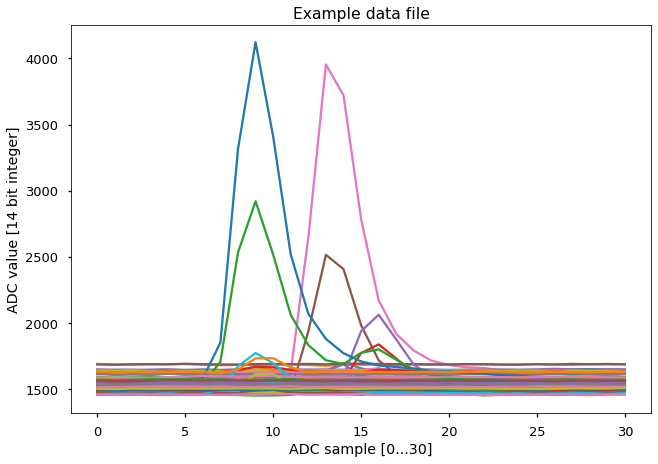

In [12]:
for event_adc_array in array_waveform:
    for adc_array in event_adc_array:
#         print (adc_array)
    
        # plot lines
        plt.plot(adc_array[:31])
        

plt.title("Example data file")
plt.xlabel("ADC sample [0...30]")
plt.ylabel("ADC value [14 bit integer]")
plt.show()